In [81]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
plt.style.use("/tmp/rose-pine-dawn.mplstyle")

--2023-10-09 11:05:36--  https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40905 (40K) [text/plain]
Saving to: ‘/tmp/rose-pine-dawn.mplstyle.2’

rose-pine-dawn.mpls 100%[===================>]  39.95K  --.-KB/s    in 0.002s  

2023-10-09 11:05:37 (17.7 MB/s) - ‘/tmp/rose-pine-dawn.mplstyle.2’ saved [40905/40905]



# <p style="background-color:#8B0000; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⇣ Reading and Cleaning Data ⇣</p>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Reading</p>

In [82]:
path = "/kaggle/input/playground-series-s3e23/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
sub = pd.read_csv(path+"sample_submission.csv")
org = pd.read_csv("/kaggle/input/software-defect-prediction/jm1.csv")

In [83]:
train=pd.concat([train.drop("id",axis=1), org], ignore_index=True)
test.drop("id",axis=1, inplace=True)

In [84]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
loc,22.0,14.0,11.0,8.0,11.0,23.0,24.0,14.0,34.0,9.0
v(g),3.0,2.0,2.0,1.0,2.0,4.0,4.0,1.0,10.0,2.0
ev(g),1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
iv(g),2.0,2.0,2.0,1.0,2.0,3.0,4.0,1.0,4.0,2.0
n,60.0,32.0,45.0,23.0,17.0,69.0,60.0,49.0,122.0,16.0
v,278.63,151.27,197.65,94.01,60.94,338.21,294.41,221.65,684.98,55.35
l,0.06,0.14,0.11,0.19,0.18,0.07,0.08,0.18,0.07,0.11
d,19.56,7.0,8.05,5.25,5.63,14.15,12.46,5.47,14.33,9.0
i,14.25,21.11,22.76,17.86,12.44,22.81,24.62,46.06,43.43,6.15
e,5448.79,936.71,1754.01,473.66,365.67,3772.51,3295.25,1183.48,9941.84,498.16


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

1.   **id** : Cardinal variable, has no meeaning for our modeling. Drop
1. **loc (Lines of Code)**: A numerical feature representing McCabe's line count of code, measuring the total number of lines in a module's code.
1. **v(g) (Cyclomatic Complexity)**: A numerical feature representing McCabe's "cyclomatic complexity," measuring the number of linearly independent paths in a program's control flow. Higher values may indicate more complex code. 
1. **ev(g) (Essential Complexity)**: A numerical feature representing McCabe's "essential complexity," measuring a program's fundamental complexity. 
1. **iv(g) (Design Complexity)**: A numerical feature representing McCabe's "design complexity," measuring the design complexity of a module. (more complexity means more failere)
1. **n (Halstead Total Operators + Operands)**: A numerical feature representing the total number of operators and operands in Halstead's metrics.
1. **v (Halstead Volume)**: A numerical feature representing Halstead's "volume," measuring the number of mental comparisons needed to write a program of a certain length.
1. **l (Halstead Program Length)**: A numerical feature representing Halstead's "program length," measuring the length of the program.
1. **d (Halstead Difficulty)**: A numerical feature representing Halstead's "difficulty," measuring the complexity of the program.
1. **i (Halstead Intelligence)**: A numerical feature representing Halstead's "intelligence," measuring the intelligence of the program.
1. **e (Halstead Effort)**: A numerical feature representing Halstead's "effort," measuring the effort required to write the program.
1. **b (Halstead)**: A numerical feature, but the specific Halstead metric it represents is not specified. It likely represents another Halstead measure related to a specific feature.
1. **t (Halstead's Time Estimator)**: A numerical feature representing Halstead's "time estimator," estimating the time required to write the program.
1. **lOCode (Halstead's Line Count)**: A numerical feature representing Halstead's line count of code.
1. **lOComment (Halstead's Count of Lines of Comments)**: A numerical feature representing Halstead's count of lines of comments.
1. **lOBlank (Halstead's Count of Blank Lines)**: A numerical feature representing Halstead's count of blank lines.
1. **lOCodeAndComment**: A numerical feature, but the specific features it represents under this name are not specified.
1. **uniq_Op (Unique Operators)**: A numerical feature measuring the number of unique operators in a module.
1. **uniq_Opnd (Unique Operands)**: A numerical feature measuring the number of unique operands in a module.
1. **total_Op (Total Operators)**: A numerical feature measuring the total number of operators in a module.
1. **total_Opnd (Total Operands)**: A numerical feature measuring the total number of operands in a module.
1. **branchCount**: A numerical feature measuring the number of branches in the flow graph.
1. **defects (Defects)**: A binary target variable indicating whether there are one or more reported defects in the module. "False" means no defects, and "true" means one or more defects.


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

### McCabe's Complexity Metrics

**1. Cyclomatic Complexity v(g):**
This metric measures the number of independent execution paths in a program's control flow. Each independent path represents a different combination of the program's execution. The higher this value, the more complex the code is considered. Cyclomatic Complexity is used to assess the understandability and maintainability of code within a module.

**2. Essential Complexity ev(g):**
This metric measures the essential complexity of a program, indicating how many different functions a program has and the complexity of each function. Essential complexity considers only the basic structure of the code.

**3. Design Complexity iv(g):**
This metric evaluates the design complexity of a program, measuring the dependence of a module on sub-modules and the interactions between sub-modules.

These metrics are used to assess the complexity, understandability, and maintainability of code. Higher complexity often implies more potential for errors.

### Halstead Metrics

Halstead developed a set of metrics to measure and predict the complexity of a program. These metrics include:

**1. Operator and Operand Counts:**
   - **Operators (N1):** The total number of operators in a program.
   - **Operands (N2):** The total number of operands in a program.
   
**2. Total Counts:**
   - **Total Length (n):** The sum of N1 and N2.

**3. Unique Operator and Operand Counts:**
   - **Unique Operator Count (n1):** The number of unique operators in a program.
   - **Unique Operand Count (n2):** The number of unique operands in a program.

**4. Halstead Metrics:**
   - **Program Volume (v):** `v = n * log2(n)`
   - **Minimum Implementation Volume (v*):** `(2 + n2) * log2(2 + n2)`
   - **Program Length (l):** `v* / n`
   - **Difficulty (d):** `1 / l`
   - **Difficulty Inverse (l'):** `1 / d`
   - **Intelligence (i):** `l' * v'`
   - **Effort to Write Program (e):** `v / l`
   - **Time to Write Program (t):** `e / 18` (in seconds)

These metrics are used to evaluate various aspects of writing, understanding, and maintaining a program.

These measures are utilized in software development processes to assess the complexity and quality of code. More organized and understandable code is generally associated with lower complexity and fewer errors.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Cleaning</p>

In [85]:
fakers=[col for col in train.columns if (train[col].dtype=="O") & (train[col].nunique()>10)]
fakers

['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

In [86]:
train["uniq_Op"][train["uniq_Op"]=="?"]

101906    ?
102121    ?
103361    ?
105977    ?
110042    ?
Name: uniq_Op, dtype: object

In [87]:
def question_marks_to_NaN(df):
    for col in df.columns:
        df[col]=np.vectorize(lambda x: np.NaN if x == "?" else x)(df[col])
question_marks_to_NaN(train)
question_marks_to_NaN(test)

In [88]:
train[fakers]=train[fakers].astype("float64")
test[fakers]=test[fakers].astype("float64")
train[fakers]=train[fakers].fillna(train[fakers].mode().iloc[0])
test[fakers]=test[fakers].fillna(test[fakers].mode().iloc[0])

In [89]:
train.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Looks like we have faker columns which act like an object while they are just numbers, also some of them have missing value but it looks like a question mark, lets convert them to NaN then fill the NaN values with mode of this columns.

In [90]:
train.duplicated().sum()

1973

In [91]:
train = train.drop_duplicates()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Let's also drop the duplicated 1973 column in the train set, don't clear the duplicates in the test set, your submission should be the same size of the competition wants.

In [92]:
num_cols=[col for col in train.columns if (train[col].dtype in ["int64","float64"]) & (train[col].nunique()>50)]
num_cols

['loc',
 'v(g)',
 'ev(g)',
 'iv(g)',
 'n',
 'v',
 'l',
 'd',
 'i',
 'e',
 'b',
 't',
 'lOCode',
 'lOComment',
 'lOBlank',
 'uniq_Op',
 'uniq_Opnd',
 'total_Op',
 'total_Opnd',
 'branchCount']

# <p style="background-color:#8B0000; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> 📈 EDA 📈</p>

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Target</p>

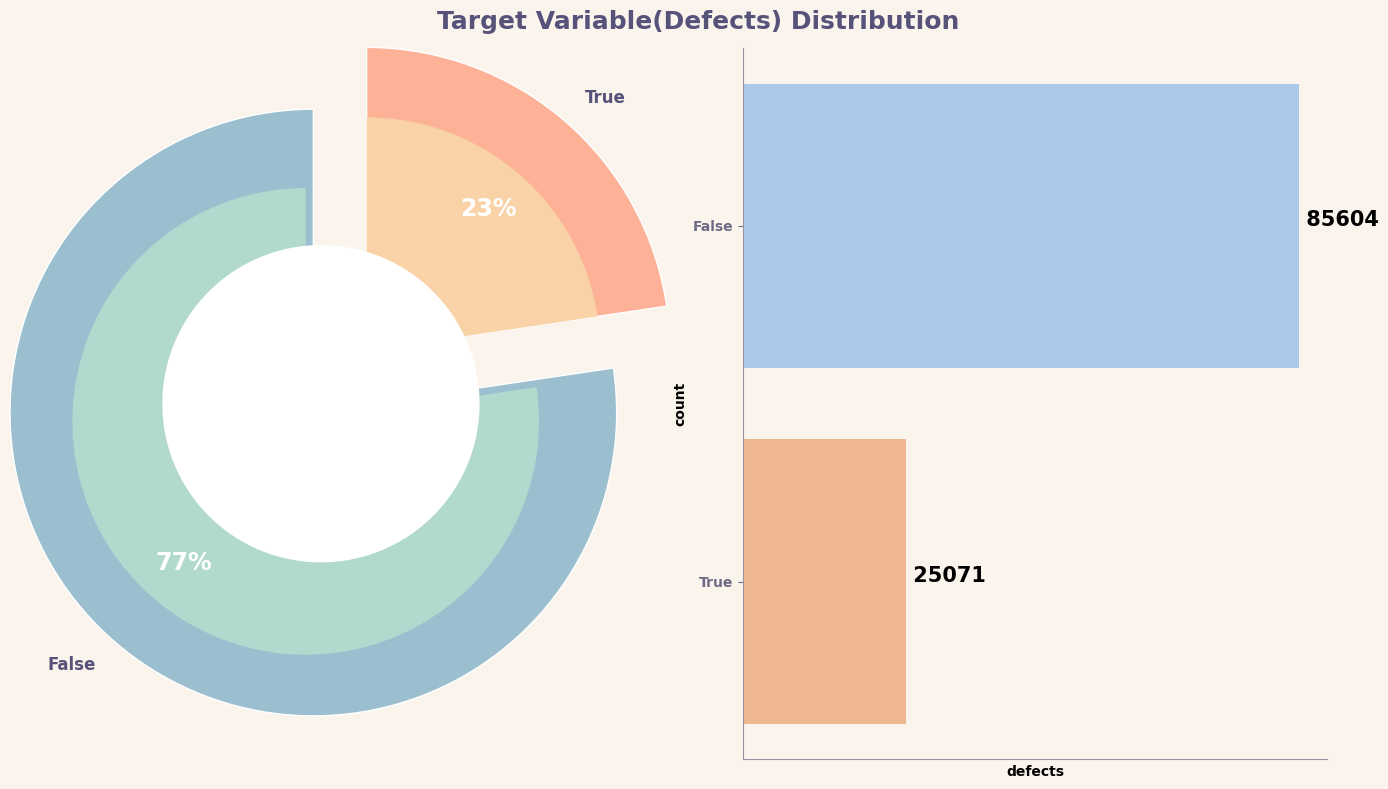

In [93]:
# https://www.kaggle.com/code/kimtaehun/eda-and-baseline-with-multiple-models
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    
    f, ax = plt.subplots(1, 2, figsize=(14, 8))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#9CBFCF', '#FDB196']
    inner_colors = ['#B1D9CD', '#FAD2A7']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 17, 
        'weight': 'bold', 
        'color': 'white'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='pastel', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i, " "+str(v), color='black', fontweight='bold', fontsize=15)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_count(train, 'defects', 'Target Variable(Defects) Distribution')

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  It looks like 23% of Target is True and 77% is False, so we have an imbalanced data, we should take it into consideration twice when modeling, do division with "stratify" before modelling, and calculate accuracy with methods that work well with imbalance data.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Categorical</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  so, yes we don't have Categorical data, but some numerics look like categorical, we will check it later if need. (checked, don't need)
    

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Numerical</p>

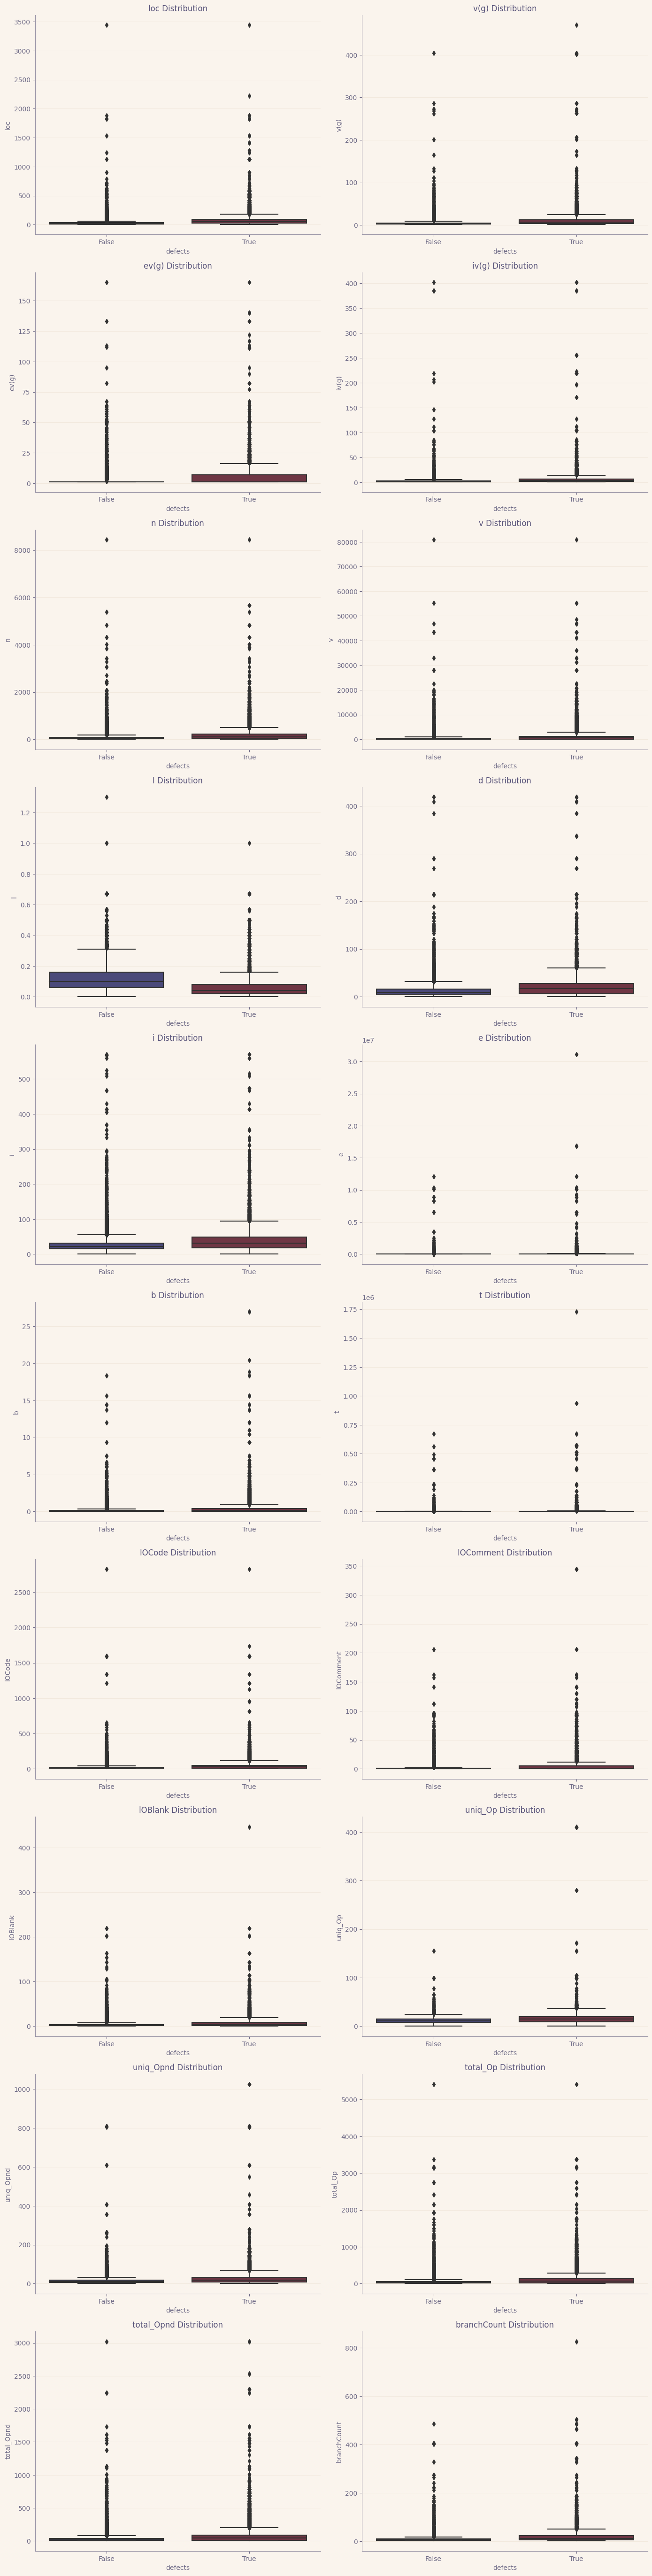

In [94]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="defects", y=column, data=train,palette="icefire")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

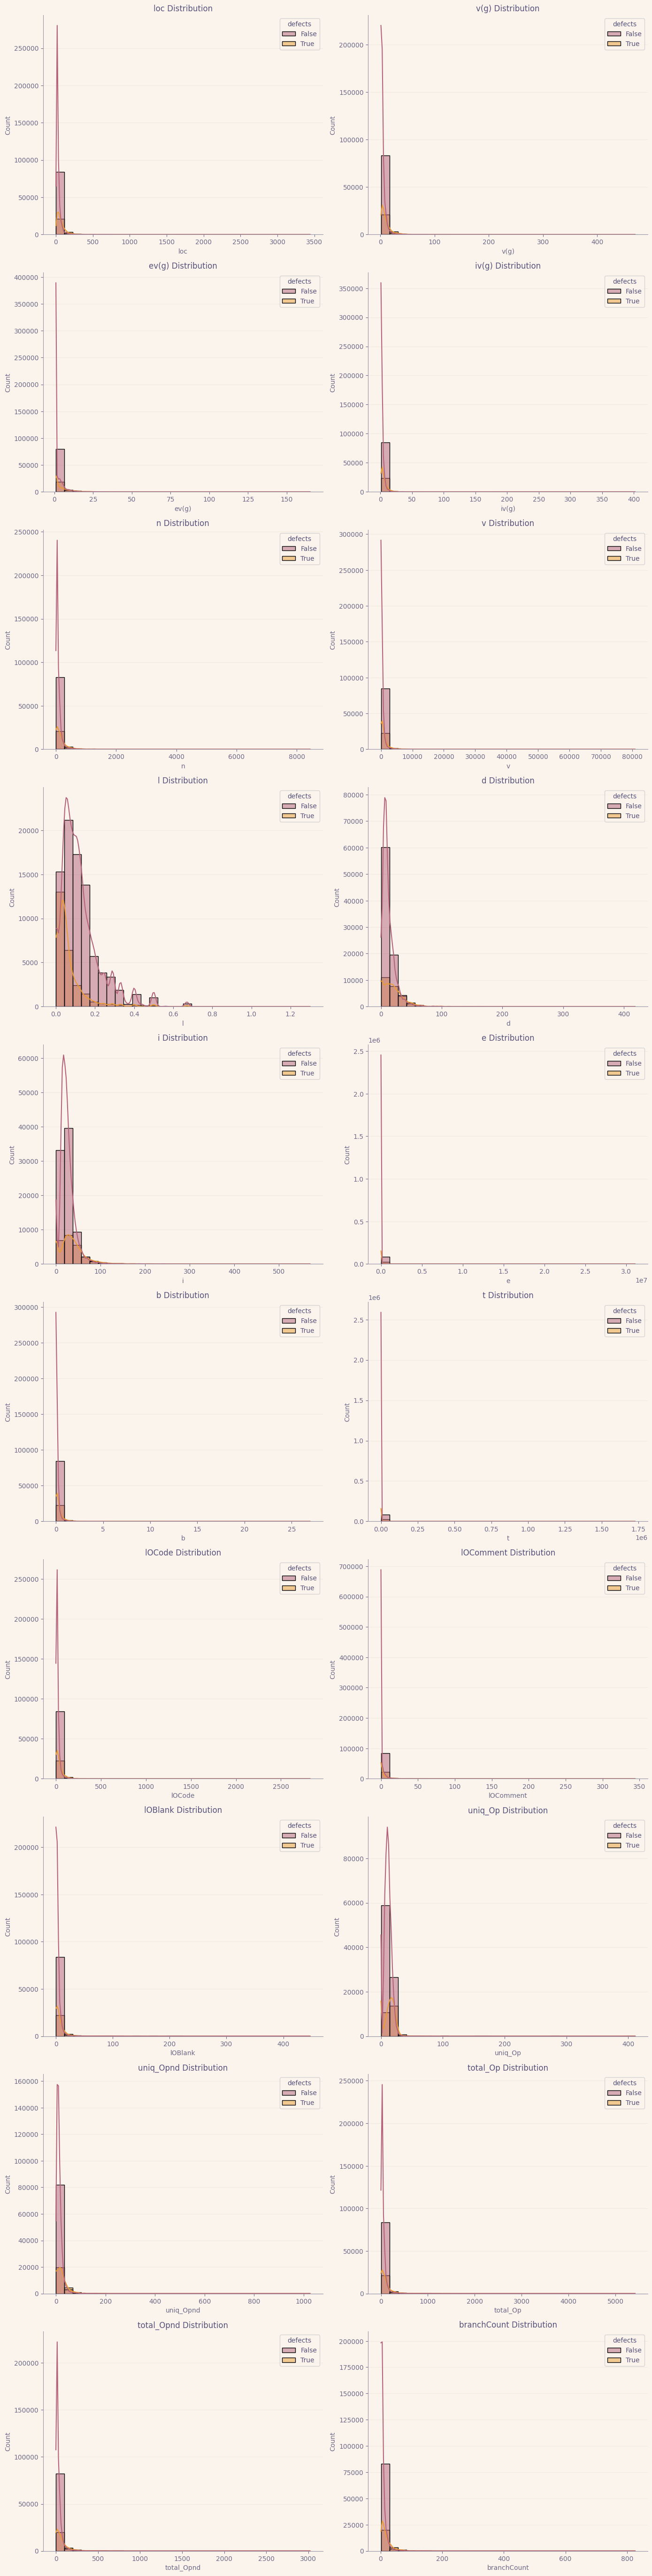

In [95]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.histplot(x=column, hue="defects", data=train,bins=30,kde=True)
    plt.title(f"{column} Distribution")
    plt.tight_layout()

<Axes: >

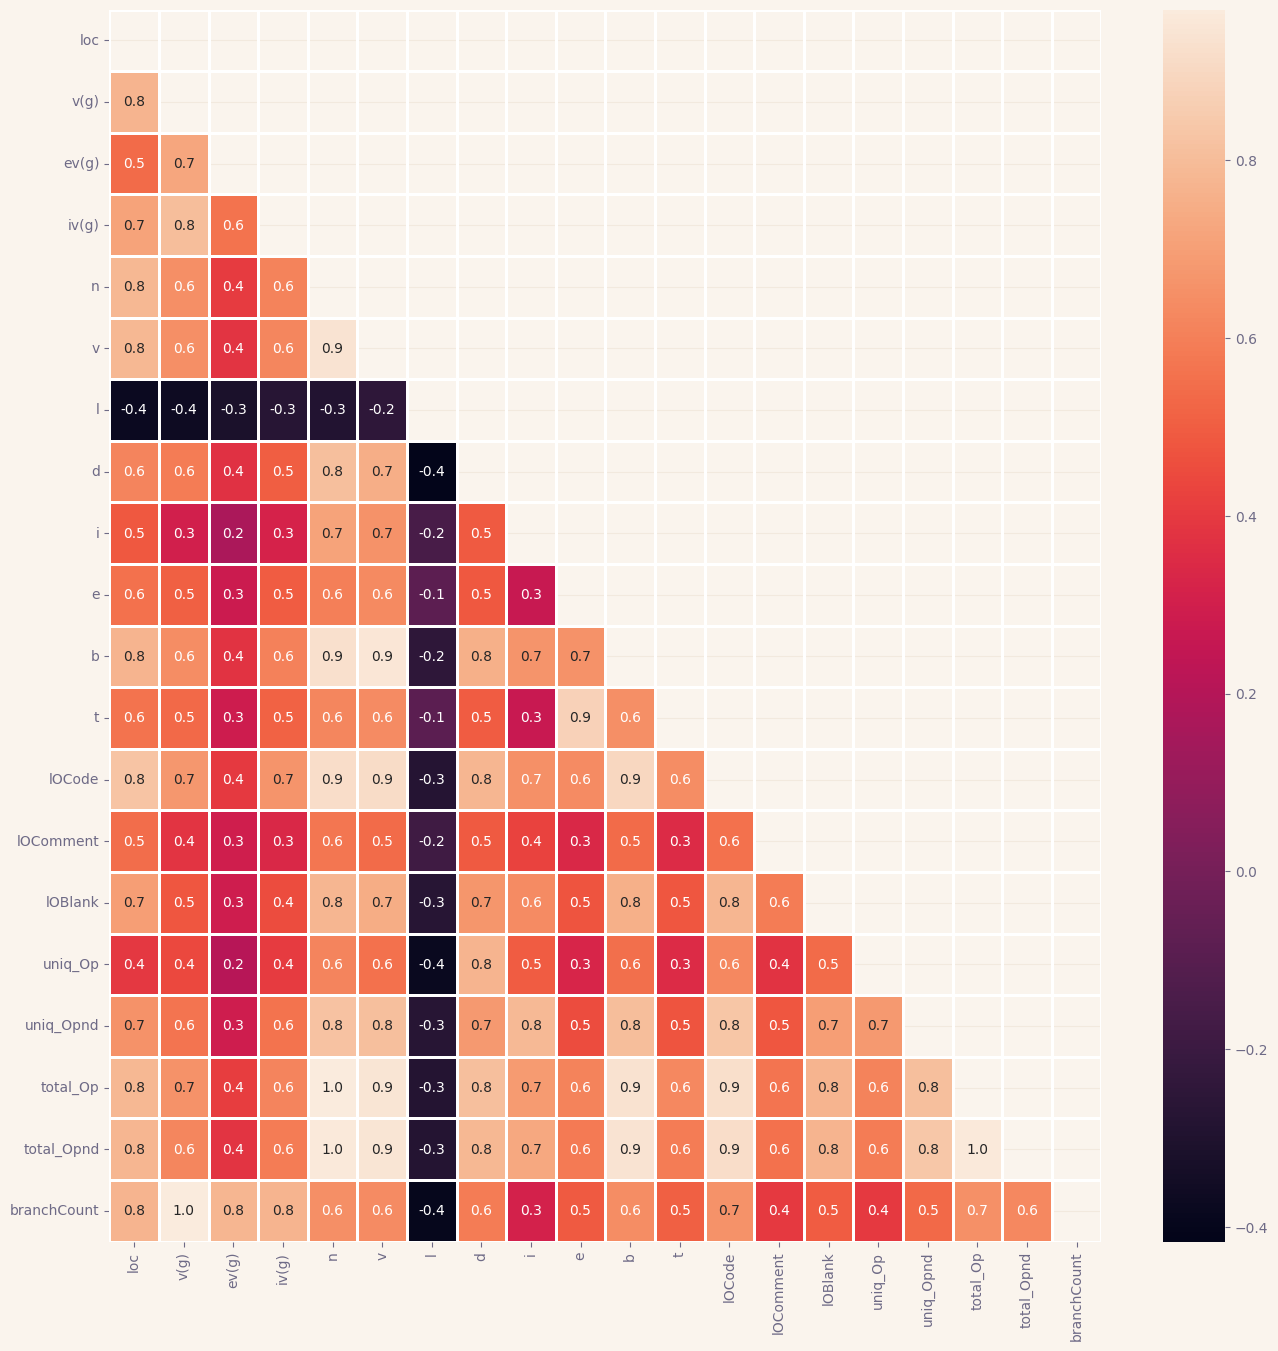

In [96]:
plt.figure(figsize=(16,16))
corr=train[num_cols].corr(numeric_only=True)
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Looks like we have highly correlated features, a lot of outliners and skewed data. Lets take care them one by one, dop one of columns which has high correlation, and max,min limit outliner, then fix the skewness of the data. But before droping correlation over 0.9, we should take care of outliners and skewness.


# <p style="background-color:#8B0000; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🛠️Feature Engineering 🛠️</p>

In [97]:
train["defects"]=train["defects"].map({False: 0,True: 1})

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Converted defects to numeric  for modeling.

In [98]:
def new_features(df):
    df["complexity"] = df["v(g)"] * df["ev(g)"] * df["iv(g)"]
    df["ComplexEffort"] =  df["complexity"] * df["e"]
    df["LocToLen"] = df["loc"] / (df["l"] + 0.0001)
new_features(train)
new_features(test)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>🛠️ New Features:</font></h3>
    
*  **complexity**: Calculates Total Complexity of the Code
*  **ComplexityEffort**: Calculates Complexity per effort
*  **LocToLen**: Calculates Code Length / Program Length

In [99]:
def corr_skew_outliner(df, cols):

    #outliner and #skewness part
    for col in cols:
        Q1 = df[col].quantile(0.01)
        Q3 = df[col].quantile(0.95)
        df.loc[df[col] < Q1, col] = Q1
        df.loc[df[col] > Q3, col] = Q3
        df[col] = np.sqrt(df[col])
        
    #correlation part
    correlation = df[cols].corr().abs()
    triangle = correlation.where(np.triu(np.ones(correlation.shape), k=1).astype(np.bool))
    drop_list = [column for column in triangle.columns if any(triangle[column] > 0.91)]
    df.drop(drop_list, axis=1, inplace=True)
        
    return df

In [100]:
train = corr_skew_outliner(train,train.drop(["defects"],axis=1).columns)
test = corr_skew_outliner(test,test.columns)

In [101]:
new_num_cols=[col for col in train.columns if (train[col].dtype in ["int64","float64"])]

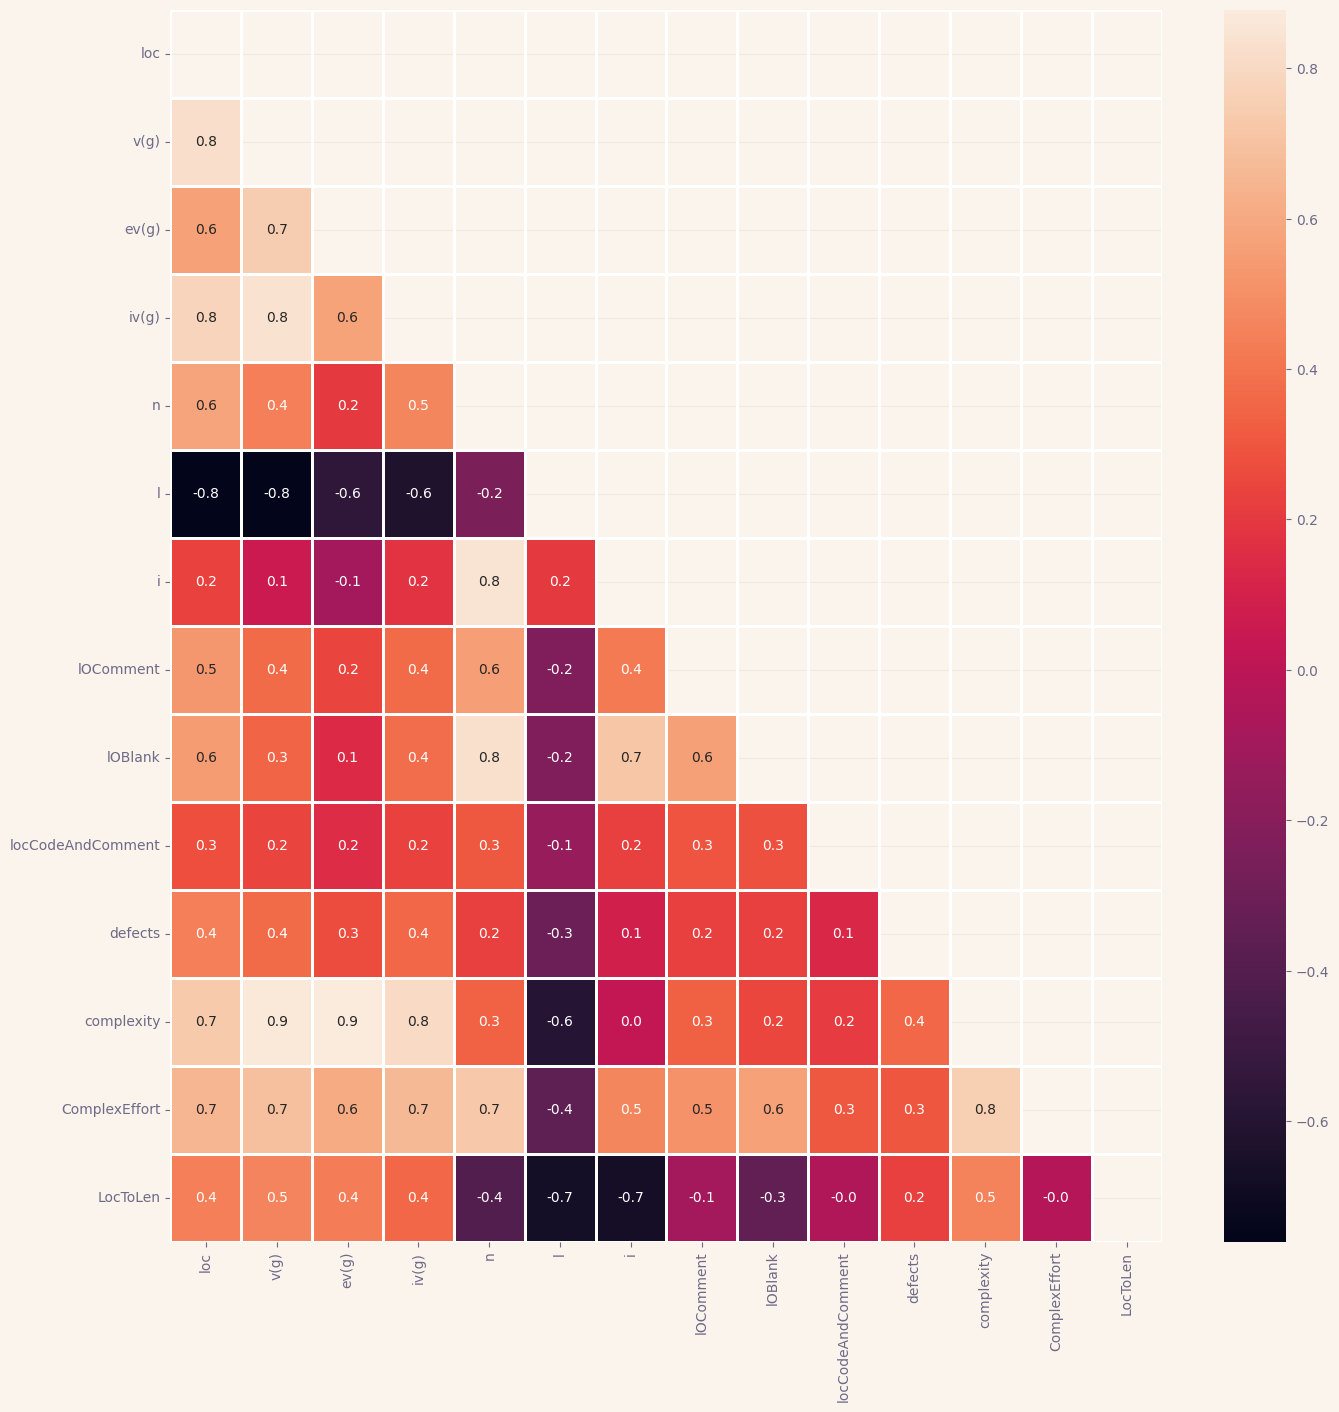

In [102]:
plt.figure(figsize=(16,16))
corr=train.corr(numeric_only=True)
mask= np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask)
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  Dropped highly correlated features after taking care of outliners and skewness

In [166]:
[print(f" Drop : {x}") for x in (set(num_cols)-set(new_num_cols))];

 Drop : uniq_Opnd
 Drop : uniq_Op
 Drop : lOCode
 Drop : b
 Drop : total_Opnd
 Drop : v
 Drop : total_Op
 Drop : d
 Drop : t
 Drop : e
 Drop : branchCount


# <p style="background-color:#8B0000; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> ⚖️Modeling⚖️</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📝 Notes:</font></h3>

*  You can reduce the size of data with PCA here, but I wont on this notebook.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Split</p>

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
X= train.drop("defects", axis=1)
y= train["defects"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state = 972, stratify=y)



### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Feature Importance</p>

0.6693092304984893

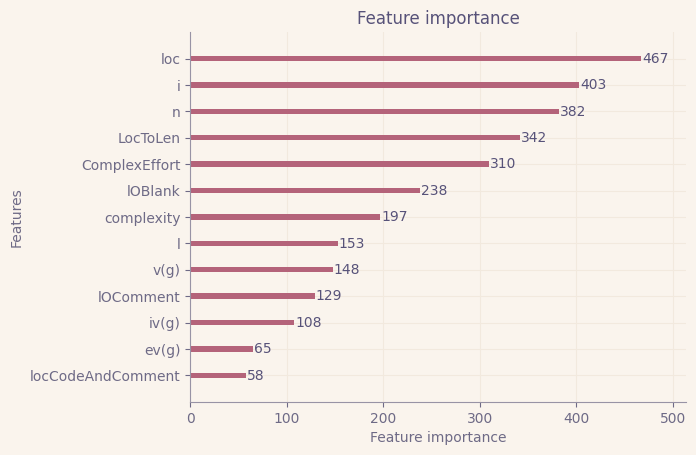

In [104]:
import lightgbm
lgb = lightgbm.LGBMClassifier()
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
roc_auc_score(y_test,lgb.predict(X_test))

0.6655042787099521

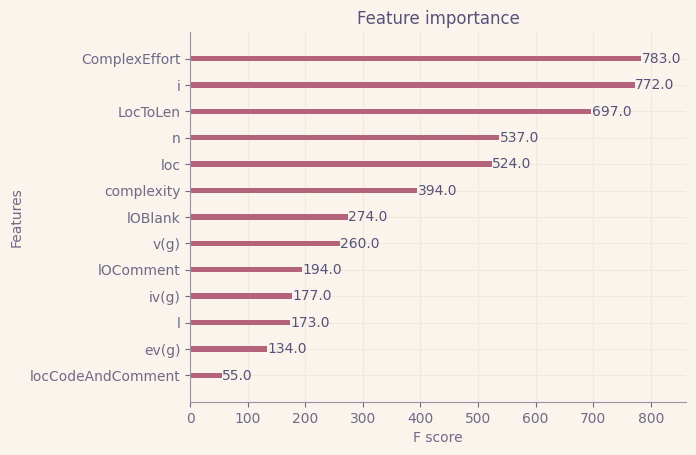

In [105]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb);
roc_auc_score(y_test,xgb.predict(X_test))

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Simple NN</p>

In [106]:
from sklearn.neural_network import MLPClassifier

ml =  MLPClassifier(hidden_layer_sizes=(100,50),random_state=42, max_iter=200, early_stopping = True)
ml.fit (X_train, y_train)
y_pred = ml.predict(X_test)
roc_auc_score(y_test,y_pred)
print('ROC: ', roc_auc_score(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

ROC:  0.6667213125523969
Accuracy:  0.8049331405854716


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">LightGBM Classifier</p>

In [107]:
from lightgbm import LGBMClassifier
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'metric': trial.suggest_categorical('metric', ['binary_error']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'device': trial.suggest_categorical('device', ['gpu']),
    }


    model_lgb = LGBMClassifier(**params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    return roc_auc_score(y_test,y_pred)

In [108]:
study_lgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [109]:
# Print the best parameters
print('Best parameters', study_lgb.best_params)

Best parameters {'metric': 'binary_error', 'max_depth': 6, 'min_child_samples': 10, 'learning_rate': 0.013623876121029744, 'n_estimators': 553, 'min_child_weight': 8, 'subsample': 0.6770032325707369, 'colsample_bytree': 0.8912218180044608, 'reg_alpha': 0.9830797418540516, 'reg_lambda': 0.8434541760243206, 'seed': 42, 'device': 'gpu'}


In [110]:
lgb = LGBMClassifier(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print('ROC: ', roc_auc_score(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

ROC:  0.6721113600060236
Accuracy:  0.8178532706902782


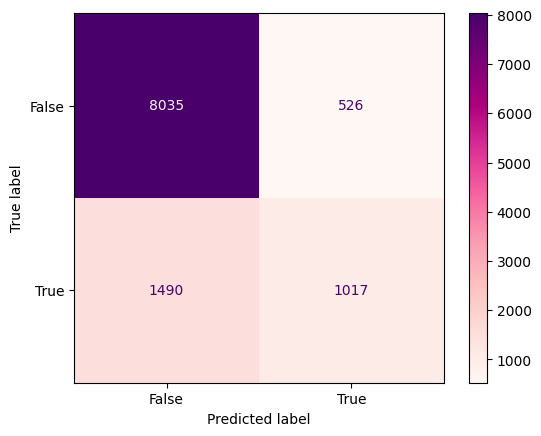

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lgb,X_test, y_test,display_labels=("False", "True"),cmap="RdPu");

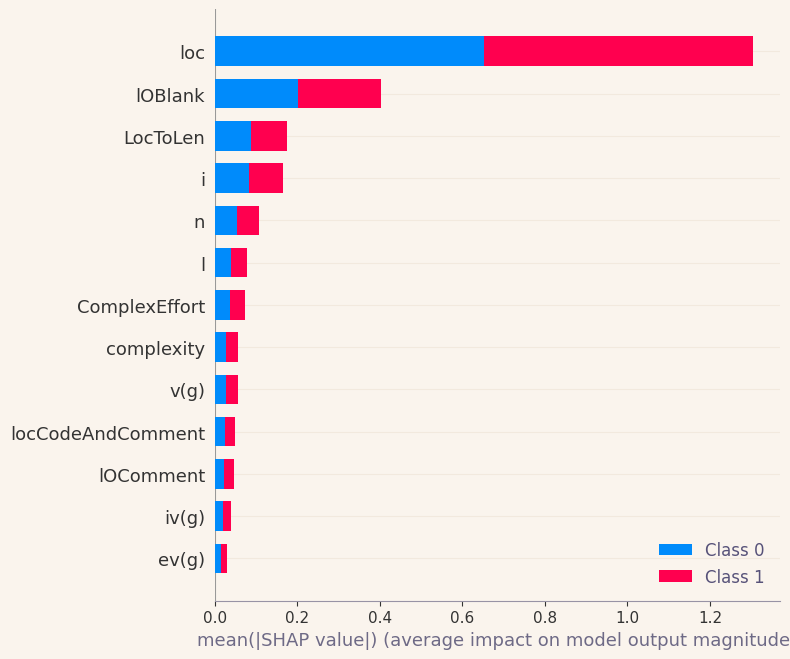

In [112]:
import shap 
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">XGBoost Classifier</p>

In [151]:
from xgboost import XGBClassifier
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'tree_method': trial.suggest_categorical('tree_method', ['gpu_hist']),
        'objective': trial.suggest_categorical('objective', ['binary:logistic']),
    }
    model_xgb = XGBClassifier(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return roc_auc_score(y_test,y_pred)

In [152]:
study_xgb = optuna.create_study(direction='maximize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [153]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 6, 'learning_rate': 0.012267210360351983, 'n_estimators': 686, 'min_child_weight': 4, 'gamma': 8.514563410696744e-06, 'subsample': 0.752826830753619, 'reg_alpha': 0.5394256222369659, 'reg_lambda': 0.7862600597417762, 'seed': 42, 'tree_method': 'gpu_hist', 'objective': 'binary:logistic'}


In [154]:
xgb = XGBClassifier(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('ROC: ', roc_auc_score(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))

ROC:  0.6735173985682048
Accuracy:  0.81893747741236


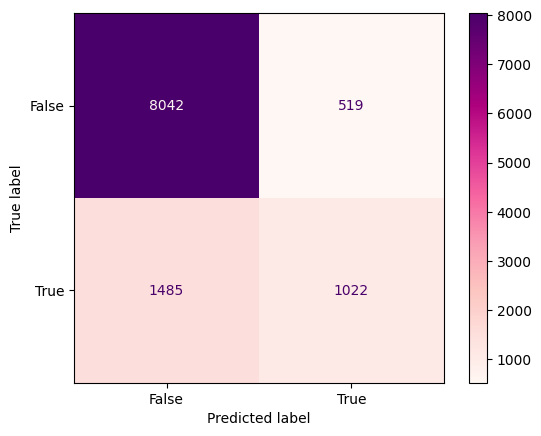

In [155]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb,X_test, y_test,display_labels=("False", "True"),cmap="RdPu");

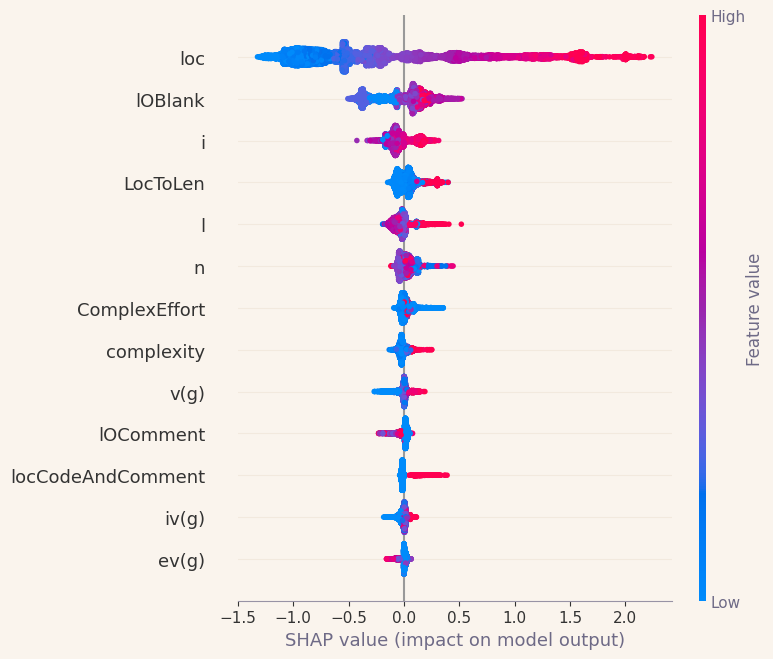

In [118]:
import shap 
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">Voting and Stacking Classifier</p>

In [156]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[
                                      ('lgbm', lgb), 
                                      ('xgb', xgb)], voting='soft')
voting.fit(X_train,y_train)
voting_pred = voting.predict(X_test)

print('ROC: ', roc_auc_score(y_test, voting_pred))
print('Accuracy: ', accuracy_score(y_test, voting_pred))

ROC:  0.6720871316184326
Accuracy:  0.8180339718106252


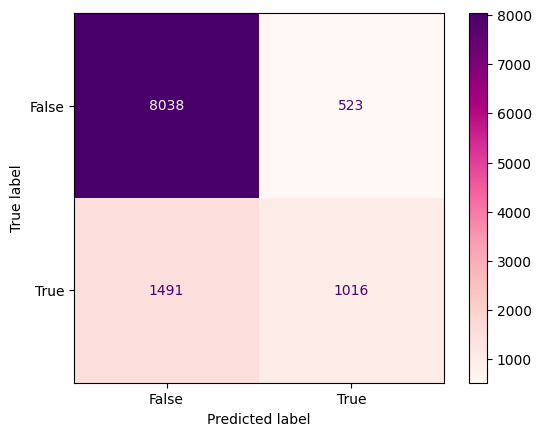

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(voting,X_test, y_test,display_labels=("False", "True"),cmap="RdPu");

In [158]:
from sklearn.ensemble import StackingClassifier
stk = StackingClassifier(estimators=[
                                      ('lgbm', lgb), 
                                      ('xgb', xgb)])
stk.fit(X_train,y_train)
stk_pred = stk.predict(X_test)

print('ROC: ', roc_auc_score(y_test, stk_pred))
print('Accuracy: ', accuracy_score(y_test, stk_pred))

ROC:  0.6715229829319862
Accuracy:  0.8180339718106252


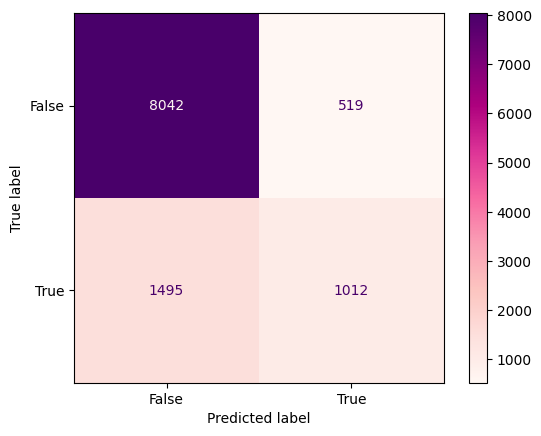

In [159]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(stk,X_test, y_test,display_labels=("False", "True"),cmap="RdPu");


# <p style="background-color:#8B0000; font-family:newtimeroman;color:#FFF9ED; font-size:150%; text-align:center; border-radius: 15px 50px;"> 🎲Prediction🎲</p>

In [160]:
sub["defects"]=voting.predict_proba(test)[:, 1]
sub.to_csv('submission.csv',index=False)
sub

,id,defects
0,101763,0.205676
1,101764,0.175681
2,101765,0.656397
3,101766,0.485147
4,101767,0.156340
...,...,...
67837,169600,0.219218
67838,169601,0.119293
67839,169602,0.168150
67840,169603,0.112629
